## Importing the libraries

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [95]:
df = pd.read_csv('Classified Data',index_col=0)

In [96]:
df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


## Standriding the scaling

In [97]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df.drop('TARGET CLASS',axis=1)) #Fit everything except Target class

StandardScaler()

## Using standard object for transformation

In [98]:
scaled_features = sc.transform(df.drop('TARGET CLASS',axis=1))
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

## Use scaled_features to recreate features data  frame

In [99]:
df.columns[:-1] #every thing except the last column

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ'], dtype='object')

In [100]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1]) #Data = scaled features and
#df.columns is a way we can grab all the list of column names
df_feat

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


# Setting X and y

In [101]:
X = df_feat
y = df.iloc[:,-1]
X

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [102]:
y

0      1
1      0
2      0
3      1
4      1
      ..
995    1
996    0
997    1
998    1
999    1
Name: TARGET CLASS, Length: 1000, dtype: int64

## Train test split

In [103]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)
X_train

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
290,-0.865812,-0.426085,-0.098704,-0.358143,-0.090834,-1.445613,0.943619,-0.711715,-1.416361,1.335201
167,-0.289633,0.427599,-0.324566,-0.291304,-1.047206,-0.847424,0.309935,-2.102427,-1.071680,0.809926
486,-1.628411,0.840546,1.164633,-0.985219,0.346949,-0.064661,1.008390,-0.184080,0.865138,-0.630975
683,-0.576123,-0.157888,0.102529,1.176857,-2.475351,-0.599677,-0.249565,0.262795,0.598726,1.376306
876,0.059207,1.006760,1.932615,2.225987,-0.570004,0.634646,2.427879,1.136821,0.104758,-0.175808
...,...,...,...,...,...,...,...,...,...,...
575,-1.254601,0.665011,0.924926,0.887703,0.844832,0.059158,0.175140,1.625825,0.960149,0.293008
838,-0.919244,-0.098256,0.802496,-1.773752,1.362249,0.461622,-0.078890,0.802612,-1.642935,-1.002668
337,1.260365,-0.871015,-0.609516,-1.171384,-0.017928,-0.392138,-0.319073,-1.276928,1.324594,-1.769629
523,-1.292073,0.932941,-1.742647,1.655153,0.861685,0.764593,-0.732563,-1.179272,-0.230603,-0.947718


In [104]:
X_test

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
545,-0.621855,0.607634,1.095271,0.132272,-0.749523,1.370756,1.115346,1.582741,-0.671901,0.974873
298,-0.422925,0.238950,-0.186787,-0.868066,0.811686,-0.194670,-1.240036,1.301344,0.323375,0.243410
109,-1.995862,-0.033739,0.960636,0.407734,0.903405,0.115802,2.151185,-0.284140,0.711896,-0.484173
837,0.153684,0.488562,0.263569,1.925549,-2.103693,1.035925,-0.298311,0.080358,-0.435076,2.089744
194,-0.583369,1.353685,0.339628,0.785814,1.251868,1.288952,-0.073212,1.185814,-0.737898,1.114822
...,...,...,...,...,...,...,...,...,...,...
847,-1.363614,1.283973,-0.961433,1.380086,-0.820755,0.984997,-1.553568,0.228551,-0.310256,-3.533290
682,0.465831,-1.249550,-0.640057,1.642450,-0.425716,-1.982328,-0.262963,-0.637191,1.810998,-1.758326
884,0.820292,-1.585249,-1.801867,-0.568317,-0.619265,0.683681,-0.074401,-0.899029,0.678849,-1.383449
325,1.101148,-2.247592,-1.092269,-0.264929,0.729435,0.526578,-0.696684,-0.977593,0.703979,-0.556975


In [105]:
y_train

290    0
167    1
486    0
683    1
876    0
      ..
575    0
838    0
337    1
523    1
863    0
Name: TARGET CLASS, Length: 700, dtype: int64

In [106]:
y_test

545    0
298    0
109    0
837    0
194    0
      ..
847    0
682    1
884    1
325    1
482    0
Name: TARGET CLASS, Length: 300, dtype: int64

<AxesSubplot:>

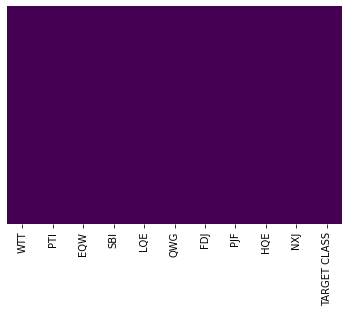

In [107]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## USinng KNN to fit
 `Using random k value`


In [108]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

## Making the predictions

In [109]:
predictions = classifier.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0], d

## Checking the confusion matrix

In [110]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predictions,y_test)
cm

array([[151,  15],
       [  8, 126]], dtype=int64)

## Checking the Classificationn report

In [111]:
from sklearn.metrics import classification_report
cf = classification_report(predictions,y_test)
print(cf)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       166
           1       0.89      0.94      0.92       134

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



## Using Elbow method to choose optimal K value

In [139]:
error_rate = [] #iterate many models using many different k values and plot out their eerror rate and see which which one has lowest error rate

for i in range(1,40): #checking every possibel k values from 1 to 40
    
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train,y_train)
    pred_i = classifier.predict(X_test)
#     print("pred_i != y_test",pred_i != y_test)
    print("np.mean(pred_i != y_test\n)=",np.mean(pred_i != y_test))
    error_rate.append(np.mean(pred_i != y_test)) #average of where our predictions are not equal to actual test value
    #pred_i != y_test line will return the fraction of those results who failed to match the test - hence your error.

np.mean(pred_i != y_test
)= 0.07666666666666666
np.mean(pred_i != y_test
)= 0.09
np.mean(pred_i != y_test
)= 0.05
np.mean(pred_i != y_test
)= 0.07
np.mean(pred_i != y_test
)= 0.056666666666666664
np.mean(pred_i != y_test
)= 0.05
np.mean(pred_i != y_test
)= 0.06666666666666667
np.mean(pred_i != y_test
)= 0.06
np.mean(pred_i != y_test
)= 0.05
np.mean(pred_i != y_test
)= 0.056666666666666664
np.mean(pred_i != y_test
)= 0.05333333333333334
np.mean(pred_i != y_test
)= 0.04666666666666667
np.mean(pred_i != y_test
)= 0.05
np.mean(pred_i != y_test
)= 0.056666666666666664
np.mean(pred_i != y_test
)= 0.056666666666666664
np.mean(pred_i != y_test
)= 0.05
np.mean(pred_i != y_test
)= 0.05
np.mean(pred_i != y_test
)= 0.04666666666666667
np.mean(pred_i != y_test
)= 0.05
np.mean(pred_i != y_test
)= 0.05333333333333334
np.mean(pred_i != y_test
)= 0.05
np.mean(pred_i != y_test
)= 0.05
np.mean(pred_i != y_test
)= 0.06333333333333334
np.mean(pred_i != y_test
)= 0.056666666666666664
np.mean(pred_i != y_tes

In [113]:
error_rate

[0.07666666666666666,
 0.09,
 0.05,
 0.07,
 0.056666666666666664,
 0.05,
 0.06666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.05333333333333334,
 0.04666666666666667,
 0.05,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.05,
 0.05333333333333334,
 0.05,
 0.05,
 0.06333333333333334,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.04666666666666667,
 0.05333333333333334,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.05]

## Plotiing the error rate

Text(0, 0.5, 'Error rate')

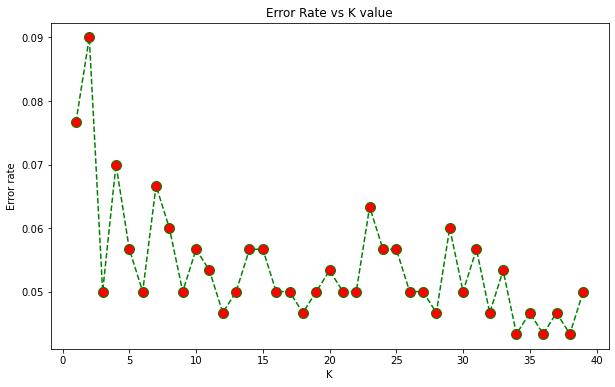

In [120]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='g' ,linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error rate')

## Changin k values

In [132]:
classifier1 = KNeighborsClassifier(n_neighbors=36)
classifier1.fit(X_train,y_train)
predictions1 = classifier1.predict(X_test)

print(confusion_matrix(predictions1,y_test))
print('\n')

print(classification_report(predictions1,y_test))


[[153   7]
 [  6 134]]


              precision    recall  f1-score   support

           0       0.96      0.96      0.96       160
           1       0.95      0.96      0.95       140

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [ ]:
! git add Knn_Intro.ipynb "Classified Data"
! git commit -m "12:25/10-06-2021"
! git push origin main